In [33]:
import matplotlib.pyplot as plt
import torch as t
import torch.nn as nn
import numpy as np

In [34]:
N = 20

X = np.random.random(N) * 10 - 5

In [35]:
Y = 0.5 * X - 1 + np.random.randn(N)

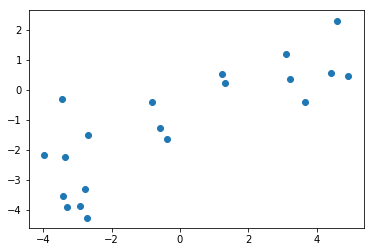

In [36]:
plt.scatter(X,Y)

In [37]:
##1 input, 1 output
model = nn.Linear(1,1)

In [39]:
##Defining loss function and the optimizer

J = nn.MSELoss()
optimizier = t.optim.SGD(model.parameters(), lr = 0.1)

In [40]:
##Reshaping data
X = X.reshape(N,1)
Y = Y.reshape(N,1)

In [42]:
##Converting to torch tensors
inputs = t.from_numpy(X.astype(np.float32))
targets = t.from_numpy(Y.astype(np.float32))

In [43]:
epochs = 100

losses = []

for epoch in range(epochs):
    
    optimizier.zero_grad()
    
    ##forward pass
    outputs = model(inputs)
    loss = J(outputs, targets)
    
    
    losses.append(loss.item())
    
    loss.backward()
    
    optimizier.step()
    

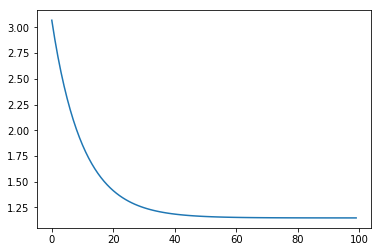

In [45]:
plt.plot(losses)

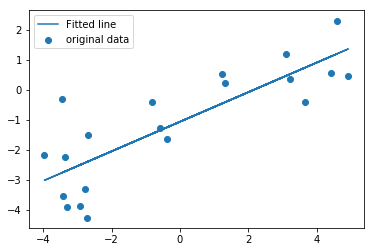

In [46]:
predicted = model(inputs).detach().numpy()

plt.scatter(X,Y, label = 'original data')

plt.plot(X, predicted, label= 'Fitted line')

plt.legend()

plt.show()